### **Data Science Project Introduction: Air Quality Analysis in Madrid**

#### **Problem Statement:** 
The project aims to conduct an extensive analysis of air quality in Madrid using a dataset collected from the Escuelas Aguirre air quality station. The primary focus is to understand the trends, patterns, and potential correlations among various pollutants in the atmosphere.

#### **Objectives:** 
1. **Comprehensive Analysis:** To analyze and interpret the hourly air quality data collected from January 2001 to March 2022.
2. **Insight Generation:** To derive valuable insights regarding the levels of different pollutants present in Madrid's atmosphere over two decades.
3. **Modeling and Visualization:** To employ data science techniques to model pollutant levels and create meaningful visualizations that aid in understanding the air quality dynamics.

#### **About Dataset:**
- **Description:** 172,622 rows of data from the Escuelas Aguirre air quality station, Madrid. The data span from January 2001 to March 2022 and include the following variables:
  - BEN Benzene (µg/m³)
  - CH4 Methane (mg/m³)
  - CO Carbon monoxide (mg/m³)
  - EBE Ethylbenzene (µg/m³)
  - NMHC Non-methane hydrocarbons (mg/m³) 
  - NO Nitrogen monoxide (µg/m³)
  - NO2 Nitrogen dioxide (µg/m³)
  - NOx Nitrogen oxides (µg/m³)
  - O3 Ozone (µg/m³)
  - PM10 Particles < 10 µm (µg/m³)
  - PM25 Particles < 2.5 µm (µg/m³) 
  - SO2 Sulfur dioxide (µg/m³)
  - TCH Total hydrocarbons (mg/m³)
  - TOL Toluene (µg/m³)
- **Context:** This dataset represents a comprehensive hourly record of pollution levels in Madrid.

#### **Team Members:**
- Turki Alkazman - (220010077)
- Turki Alqou - (220011703)

#### **Context and Insights Aimed:**
- Contextualizing variations in pollutant levels over a 21-year period.
- Identifying potential correlations between different pollutants.
- Exploring seasonal patterns and their impact on air quality.
- Uncovering long-term trends to better comprehend Madrid's environmental conditions.
- Employing machine learning techniques to model and predict pollutant levels, if applicable and beneficial for the analysis.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data\MadridPolution2001-2022.csv")

df.shape

<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Turki\AppData\Local\Temp\ipykernel_27420\1171371227.py:6: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("data\MadridPolution2001-2022.csv")


(172622, 15)

## Initial Data Overview: Displaying First Ten Rows
To gain an initial understanding of the dataset structure and its contents, the code snippet `df.head(10)` was executed to display the first ten rows of the dataset.

### Observations:
- The table exhibits the first ten rows of the dataset, showing measurements of various pollutants (BEN, CH4, CO, EBE, NMHC, NO, NO2, NOx, O3, PM10, PM25, SO2, TCH, TOL) at different timestamps.
- Some columns contain 'NaN' values, indicating missing data points in the initial rows.
- The 'Time' column represents timestamps indicating the date and time of pollutant measurements.

This overview provides an initial glimpse into the dataset's structure, displaying the first ten rows and revealing the presence of missing values in the pollutant measurements.


In [2]:
df.head(10)

,Time,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
0,2001-01-01 00:00:00+00:00,4.0,NaN,0.0,2.0,NaN,66.0,67.0,168.0,7.0,32.0,NaN,26.0,NaN,11.0
1,2001-01-01 01:00:00+00:00,9.0,NaN,0.0,5.0,NaN,146.0,71.0,294.0,7.0,41.0,NaN,21.0,NaN,21.0
2,2001-01-01 02:00:00+00:00,9.0,NaN,0.0,5.0,NaN,190.0,73.0,364.0,7.0,50.0,NaN,22.0,NaN,24.0
3,2001-01-01 03:00:00+00:00,10.0,NaN,0.0,5.0,NaN,170.0,75.0,335.0,7.0,55.0,NaN,19.0,NaN,25.0
4,2001-01-01 04:00:00+00:00,8.0,NaN,0.0,4.0,NaN,102.0,67.0,224.0,8.0,42.0,NaN,14.0,NaN,21.0
5,2001-01-01 05:00:00+00:00,3.0,NaN,1.0,2.0,NaN,63.0,60.0,157.0,8.0,21.0,NaN,10.0,NaN,10.0
6,2001-01-01 06:00:00+00:00,2.0,NaN,0.0,1.0,NaN,28.0,47.0,90.0,17.0,14.0,NaN,8.0,NaN,6.0
7,2001-01-01 07:00:00+00:00,2.0,NaN,1.0,1.0,NaN,33.0,43.0,93.0,21.0,13.0,NaN,8.0,NaN,6.0
8,2001-01-01 08:00:00+00:00,2.0,NaN,1.0,1.0,NaN,36.0,49.0,105.0,20.0,17.0,NaN,8.0,NaN,6.0
9,2001-01-01 09:00:00+00:00,2.0,NaN,1.0,1.0,NaN,25.0,43.0,82.0,24.0,15.0,NaN,7.0,NaN,5.0


## Identification of Columns with Missing Values

To identify columns containing missing values within the dataset, the code snippet `df.columns[df.isnull().any()]` was executed.

The output reveals the columns with missing values.

These columns contain 'NaN' values, indicating missing data points within the dataset. Handling these missing values will be a crucial step in the data preprocessing phase.


In [3]:
# find outlist of columns with missing values
df.columns[df.isnull().any()]

Index(['BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'PM25', 'SO2', 'TCH', 'TOL'],
      dtype='object')

## Percentage of Missing Values in Each Column

To understand the extent of missing data in the dataset, the code `df.isnull().sum() / df.shape[0] * 100` was executed. This calculated the percentage of missing values in each column.

The table below displays the columns and their respective percentages of missing values.

The significant proportion of missing values in columns such as PM25 indicates potential challenges in data integrity and highlights the need for handling missing values during the preprocessing stage.

In [4]:
# find out the percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

Time     0.000000
BEN      4.502323
CH4     18.867236
CO       0.251996
EBE      4.538819
NMHC    18.913580
NO       0.408986
NO2      0.405510
NOx      0.407828
O3       0.999293
PM10     2.544867
PM25    38.564030
SO2      0.444323
TCH     18.868395
TOL      4.714926
dtype: float64

## Checking for Duplicate Rows

Executing `df.duplicated().sum()` aimed to identify duplicate rows within the dataset. In this particular dataset, which comprises time series data, the result returned was 0.

The output indicates that there are no duplicate rows present in the dataset. This is anticipated in time series data where each row corresponds to a unique timestamp, ensuring there are no identical data entries observed.

In [5]:
# check for duplicate rows
df.duplicated().sum()
## 0 rows becuase it is a time series data

0

## Outliers Detection and Removal Using IQR (Interquartile Range)

We employed the Interquartile Range (IQR) method to identify and remove outliers from the dataset

### Outliers Removal:
- Rows containing values falling outside the range of (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR) were removed from the dataset.
- After the outlier removal process, the dataset shape reduced to (114556, 15) indicating the updated number of rows and columns.

The identification and removal of outliers through the IQR method resulted in a dataset with potentially more refined and normalized values, contributing to a cleaner dataset for further analysis.


In [6]:
# find IQR for each column except Time
Q1 = df.iloc[:, 1:].quantile(0.25)
Q3 = df.iloc[:, 1:].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Remove outliers
df = df[~((df.iloc[:, 1:] < (Q1 - 1.5 * IQR)) | (df.iloc[:, 1:] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

BEN       0.00
CH4       0.00
CO        0.00
EBE       1.00
NMHC      0.00
NO       40.25
NO2      40.00
NOx     100.00
O3       42.00
PM10     22.00
PM25      9.00
SO2       7.00
TCH       0.00
TOL       4.00
dtype: float64
(114556, 15)


## Analysis: Missing Values Overview

### Number of Missing Values in Each Column:
We created a dictionary to track the count of missing values in each column using the code snippet provided. 

### Percentage of Missing Values in Columns:
Additionally, we calculated the percentage of missing values in each column using `df1.isnull().sum() / df1.shape[0] * 100`. The output percentage of missing values in columns is shown as a series:
- 'Time': 0.00%
- 'BEN': 4.37%
- 'CH4': 19.32%
- 'CO': 0.24%
- 'EBE': 4.38%
- 'NMHC': 19.38%
- 'NO': 0.41%
- 'NO2': 0.41%
- 'NOx': 0.41%
- 'O3': 1.03%
- 'PM10': 2.69%
- 'PM25': 34.57%
- 'SO2': 0.41%
- 'TCH': 19.32%
- 'TOL': 4.45%

These findings highlight the varying degrees of missing values across different pollutants in the dataset, essential for subsequent data preprocessing steps and imputation strategies.


In [7]:
# label number of missing values in a dict 
dict = {
    'BEN':df['BEN'].isnull().sum(),
    'CH4':df['CH4'].isnull().sum(),
    'CO':df['CO'].isnull().sum(),
    'EBE':df['EBE'].isnull().sum(),
    'NMHC':df['NMHC'].isnull().sum(),
    'NO':df['NO'].isnull().sum(),
    'NO2':df['NO2'].isnull().sum(),
    'NOx':df['NOx'].isnull().sum(),
    'O3':df['O3'].isnull().sum(),
    'PM10':df['PM10'].isnull().sum(),
    'PM25':df['PM25'].isnull().sum(),
    'SO2':df['SO2'].isnull().sum(),
    'TCH':df['TCH'].isnull().sum(),
    'TOL':df['TOL'].isnull().sum()
}

In [8]:
# make a copy of the dataset
df1 = df.copy()

In [9]:
df1.isnull().sum()/df1.shape[0]*100

Time     0.000000
BEN      4.371661
CH4     19.317190
CO       0.242676
EBE      4.378645
NMHC    19.376549
NO       0.413771
NO2      0.411153
NOx      0.414644
O3       1.031810
PM10     2.686895
PM25    34.570865
SO2      0.406788
TCH     19.318063
TOL      4.450225
dtype: float64

## Missing Values Imputation: Filling Strategy

### Handling Missing Values:
We applied a strategy to fill missing values in the dataset based on a criterion considering the column's percentage of missing values. The process involved:

- **Identifying Columns for Imputation:** Columns with missing values less than or equal to 4% of the dataset size were chosen for imputation.

- **Imputation Technique:** For selected columns:
  - Columns with missing values were filled using a combination of forward fill (ffill) and backward fill (bfill) methods.
  - Forward fill (ffill) was used to fill missing values with the previous available value.
  - Backward fill (bfill) was used to fill missing values with the next available value.
  
### Updated Missing Values Percentage:
After the imputation process, we revised the percentage of the missing values which can be found in the output below.

The missing values in columns 'BEN', 'CH4', 'EBE', 'NMHC', 'PM25', and 'TOL' were not addressed due to exceeding the 4% threshold, retaining their respective percentages of missing values. However, other columns were successfully imputed, resulting in a reduction or elimination of missing values.

In [10]:
# fill missing values with Next or Previous Value with the lowest number of missing values
for i in dict:
    if dict[i] <= df1.shape[0]*0.04:
        # fill missing values with Next Value
        df1[i].bfill(inplace=True)
        # fill missing values with Previous Value
        df1[i].ffill(inplace=True)
df1.isnull().sum()/df1.shape[0]*100

Time     0.000000
BEN      4.371661
CH4     19.317190
CO       0.000000
EBE      4.378645
NMHC    19.376549
NO       0.000000
NO2      0.000000
NOx      0.000000
O3       0.000000
PM10     0.000000
PM25    34.570865
SO2      0.000000
TCH     19.318063
TOL      4.450225
dtype: float64

## Missing Values Imputation: K Nearest Neighbors (KNN) and Rounding

### Imputing Missing Values using KNN and Rounding:
We performed K Nearest Neighbors (KNN) imputation to address missing values in specific columns ('BEN', 'EBE', 'TOL') due to their lower percentage of missing values:

- **Columns Selected for Imputation:** The columns 'BEN', 'EBE', and 'TOL' were chosen for KNN imputation as they had a lower percentage of missing values.

- **K Nearest Neighbors (KNN) Imputer:** Using sklearn's `KNNImputer` with `n_neighbors=25`, missing values in the aforementioned columns were imputed based on the nearest neighbors' values.

- **Rounding to Integer Values:** After imputation, the values in columns 'BEN', 'EBE', and 'TOL' were rounded to the nearest integers using `.round()` and converted to integer type with `.astype(int)`.

### Updated Missing Values Percentage:
The KNN imputation and rounding strategy significantly reduced the missing values in 'BEN', 'EBE', and 'TOL' columns to zero, while other columns maintain their respective percentages of missing values.


In [11]:
# K Nearest Neighbors Imputation with BEN, EBE, and TOL coulmns and round the values to int
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=25)

columns_to_impute = ['BEN','EBE','TOL']

df1[columns_to_impute] = imputer.fit_transform(df1[columns_to_impute])

df1['BEN'] = df1['BEN'].round().astype(int)
df1['EBE'] = df1['EBE'].round().astype(int)
df1['TOL'] = df1['TOL'].round().astype(int)

df1.isnull().sum()/df1.shape[0]*100

Time     0.000000
BEN      0.000000
CH4     19.317190
CO       0.000000
EBE      0.000000
NMHC    19.376549
NO       0.000000
NO2      0.000000
NOx      0.000000
O3       0.000000
PM10     0.000000
PM25    34.570865
SO2      0.000000
TCH     19.318063
TOL      0.000000
dtype: float64

## Missing Value Prediction using Iterative Imputer

### Applying Iterative Imputer:
We utilized the Iterative Imputer from sklearn to predict and fill missing values in columns ('CH4', 'NMHC', 'TCH'). 

- **Columns Treated with Iterative Imputer:** The imputation was performed specifically on columns 'CH4', 'NMHC', and 'TCH'.

- **Imputation Technique:** Iterative Imputer employs an iterative approach to predict and fill missing values based on other available features in the dataset.

- **Rounding Imputed Values to Integers:** Following the imputation process, values in columns 'CH4', 'NMHC', and 'TCH' were rounded to the nearest integers using `.round()` and converted to integer type with `.astype(int)`.

### Updated Missing Values Percentage:
The Iterative Imputer successfully filled missing values in 'CH4', 'NMHC', and 'TCH' columns, resulting in zero missing values in these columns. However, the 'PM25' column still retains the same percentage of missing values as before the imputation.


In [12]:
# Missing Value Prediction with Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()

df1[['CH4','NMHC','TCH']] = imputer.fit_transform(df1[['CH4','NMHC','TCH']])

df1['CH4'] = df1['CH4'].round().astype(int)
df1['NMHC'] = df1['NMHC'].round().astype(int)
df1['TCH'] = df1['TCH'].round().astype(int)

df1.isnull().sum()/df1.shape[0]*100

Time     0.000000
BEN      0.000000
CH4      0.000000
CO       0.000000
EBE      0.000000
NMHC     0.000000
NO       0.000000
NO2      0.000000
NOx      0.000000
O3       0.000000
PM10     0.000000
PM25    34.570865
SO2      0.000000
TCH      0.000000
TOL      0.000000
dtype: float64

## Handling Missing Values in the 'PM25' Column

### Statistical Summary of 'PM25' Column after Imputation:
After imputation and addressing missing values in the 'PM25' column, here is a statistical summary of the available data:

- **Count of Non-Missing Values:** 74,953 entries are available after imputation.
- **Mean Value:** The mean value of 'PM25' is approximately 8.99.
- **Standard Deviation:** The standard deviation is around 5.38, indicating the spread of values around the mean.
- **Minimum and Maximum Values:** The minimum recorded value is 0, while the maximum is 28.
- **Quartiles:** 
  - 25% of the values fall below 5.
  - 50% of the values fall below 8.
  - 75% of the values fall below 12.

This statistical summary helps us understand the distribution and central tendencies of the 'PM25' column after handling missing values. The imputed values seem to exhibit a range between 0 to 28, with an average value close to 9.


In [13]:
# dealing with 38% missing values in PM25 column
df1['PM25'].describe()

count    74953.000000
mean         8.993890
std          5.377724
min          0.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         28.000000
Name: PM25, dtype: float64

## Imputation of Missing Values in 'PM25' Column with Mean

### Handling Missing Values in 'PM25':
To address the missing values in the 'PM25' column, a mean imputation strategy was employed. The missing values in the 'PM25' column were filled using the mean value of the available data.

After applying the mean imputation technique:
- **Missing Values:** The missing values in the 'PM25' column have been successfully filled.
- **No Missing Values:** The output indicates that there are no longer any missing values present in the dataset for any column.
- **Completion:** All columns now have 0% missing values, ensuring a complete dataset for further analysis or modeling.

The imputation using the mean strategy allowed us to address missing data in the 'PM25' column, resulting in a complete dataset ready for subsequent analysis or modeling.

In [14]:
# fill missing values of PM25 with mean
df1['PM25'] = df1['PM25'].fillna(df1['PM25'].mean())

df1.isnull().sum()/df1.shape[0]*100

Time    0.0
BEN     0.0
CH4     0.0
CO      0.0
EBE     0.0
NMHC    0.0
NO      0.0
NO2     0.0
NOx     0.0
O3      0.0
PM10    0.0
PM25    0.0
SO2     0.0
TCH     0.0
TOL     0.0
dtype: float64

## Data Transformation: Temporal Aggregation and Date Features Addition

### Time Data Transformation:
The 'Time' column was converted to a datetime format and truncated to represent only the date (YYYY-MM-DD format).

### Data Type Conversion:
All columns except 'Time' were converted to integers. This step facilitated numerical operations and analysis on the data.

### Temporal Aggregation:
The dataset was grouped by a 24-hour period ('Time') and the mean was calculated for each column. This aggregation process aimed to condense the data for daily analysis.

### Addition of Date Features:
- **Day of the Week (Day):** A new column 'Day' was added to denote the day of the week corresponding to each date.
- **Month of the Year (Month):** Another new column 'Month' was included, indicating the month of the year associated with each date.
- **Year (Year):** A 'Year' column was introduced to represent the year corresponding to each date.

The output showcases a preview of the dataset after these transformations, where the aggregated mean values for each feature over a 24-hour period are displayed, alongside additional columns representing the day of the week, month, and year.


In [15]:
df1['Time'] = pd.to_datetime(df1['Time']).dt.strftime('%Y-%m-%d %H:%M:%S').str[:10]

# convert all datatypes to int except date 
for i in df1.columns:
    if i != 'Time':
        df1[i] = df1[i].astype(int)

# group all data by 24 hours and calculate the mean
df1 = df1.groupby(df1['Time']).mean()

# add a new column for the day of the week
df1['Day'] = pd.to_datetime(df1.index).day_name()

# add a new column for the month of the year
df1['Month'] = pd.to_datetime(df1.index).month_name()

# add a new column for the year
df1['Year'] = pd.to_datetime(df1.index).year

df1.head(10)

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL,Day,Month,Year
Time,,,,,,,,,,,,,,,,,
2001-01-02,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,8.0,5.000000,1.0,2.000000,Tuesday,January,2001
2001-01-03,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,8.0,4.000000,1.0,2.666667,Wednesday,January,2001
2001-01-04,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,8.0,4.500000,1.0,2.000000,Thursday,January,2001
2001-01-08,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,8.0,6.333333,1.0,2.666667,Monday,January,2001
2001-01-11,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,8.0,7.800000,1.0,2.600000,Thursday,January,2001
2001-01-17,0.0,1.0,0.0,0.0,0.0,7.000000,27.000000,38.000000,21.000000,8.000000,8.0,4.000000,1.0,3.000000,Wednesday,January,2001
2001-01-21,0.0,1.0,0.0,1.0,0.0,36.500000,53.000000,108.500000,32.500000,21.500000,8.0,17.500000,1.0,3.000000,Sunday,January,2001
2001-01-22,0.0,1.0,0.0,1.0,0.0,41.000000,64.333333,127.333333,6.333333,27.333333,8.0,16.333333,1.0,3.000000,Monday,January,2001
2001-01-23,0.0,1.0,0.0,0.0,0.0,11.000000,22.000000,39.000000,31.000000,5.000000,8.0,5.000000,1.0,3.000000,Tuesday,January,2001


## Dropping Time Column

### Reset Index:
The index was reset in the dataset to accommodate the 'Time' column as a regular column.

### Dropping the 'Time' Column:
The 'Time' column was removed from the dataset using the `drop()` function along the axis of columns (axis=1). This step involved eliminating the 'Time' column from the dataset.

In [16]:
# drop time column
df1.reset_index(inplace=True)
df1.drop('Time',axis=1,inplace=True)

## Air Quality Index (AQI) Calculation

### AQI Calculator Function:
The function `AQI_calculator()` is designed to compute the Air Quality Index (AQI) based on different pollutants over various time intervals. 
- Pollutants measured over 24 hours include PM10 and PM2.5, with respective standard limits of 50 and 25 micrograms/m3.
- Pollutants measured over 8 hours include NO2 and O3, with standard limits of 9 parts per million (ppm) and 0.065 ppm, respectively.
- CO measured over 1 hour has a standard limit of 0.08 ppm.

### Calculations:
- The function calculates AQI values for each of the pollutants based on their corresponding standards. It divides the pollutant concentration by the respective standard for each time interval.
- The average AQI across all pollutants is computed as 'AQI_AVG' by taking the mean of the AQI values for PM10, PM2.5, NO2, O3, and CO.

### Applying AQI Calculator:
The `AQI_calculator()` function is applied to the DataFrame 'df1' to calculate the AQI values and append these values as new columns in the DataFrame.


In [17]:
# calculate AQI 
def AQI_calculator(df):
    pollutant_24h = ['PM10','PM25']
    pollutant_8h = ['NO2','O3']
    pollutant_1h = 'CO'
    standard_24h = [50,25] # standard for 24 hours microgram/m3
    standard_8h = [9,0.065] # standard for 8 hours parts per million
    standard_1h = 0.08 # standard for 1 hour parts per million
    for i in range(len(pollutant_24h)):
        df[f'AQI_{pollutant_24h[i]}'] = (df[pollutant_24h[i]]/standard_24h[i])
        df[f'AQI_{pollutant_8h[i]}'] = ((df[pollutant_8h[i]]/3)/standard_8h[i])
        df[f'AQI_{pollutant_1h}'] = ((df[pollutant_1h]/24)/standard_1h)
    df['AQI_AVG'] = df[['AQI_PM10','AQI_PM25','AQI_NO2','AQI_O3','AQI_CO']].mean(axis=1)
    return df

df1 = AQI_calculator(df1)

## AQI Classification into Categories

### AQI Classifier Function:
The function `AQI_classifier()` categorizes the Air Quality Index (AQI) into six distinct categories based on the average AQI values:
- 'Very Good' (0-33)
- 'Good' (34-66)
- 'Fair' (67-99)
- 'Poor' (100-149)
- 'Very Poor' (150-199)
- 'Hazardous' (200-299)

### Categorization Process:
- The function utilizes `pd.cut()` from the Pandas library to classify the 'AQI_AVG' values into the specified bins representing the AQI categories.
- The resultant categories are labeled accordingly: 'Very Good', 'Good', 'Fair', 'Poor', 'Very Poor', and 'Hazardous'.

### Application:
The `AQI_classifier()` function is applied to the DataFrame 'df1' to categorize the average AQI values into these defined categories, and the result is added as a new column 'AQI_category' in the DataFrame.

In [18]:
# classify AQI into 6 categories
# 0-33 very good, 34-66 good, 67-99 Fair, 100-149 poor , 150-199 very poor, 200-299 Hazardous
def AQI_classifier(df):
    df['AQI_category'] = pd.cut(df['AQI_AVG'],bins=[0,34,67,90,150],labels=['Very Good','Good','Fair','Poor'])
    return df
df1 = AQI_classifier(df1)

## Final Processed DataFrame Overview: 

The processed DataFrame 'df1' contains the following columns after applying various preprocessing and feature engineering techniques:

- **Features:**
    - BEN, CH4, CO, EBE, NMHC, NO, NO2, NOx, O3, PM10, PM25, SO2, TCH, TOL
- **Additional Features Derived:**
    - Day, Month, Year - Extracted from the 'Time' column and representing the respective day of the week, month name, and year.
    - AQI_PM10, AQI_NO2, AQI_CO, AQI_PM25, AQI_O3, AQI_AVG - Calculated Air Quality Index values for different pollutants and their average.
    - AQI_category - Classification of AQI_AVG into 'Very Good', 'Good', 'Fair', 'Poor', 'Very Poor', and 'Hazardous' categories.

### First Few Rows of Processed DataFrame 'df1':

The provided output showcases a snippet of the first few rows of the processed DataFrame 'df1' with 6927 rows and 24 columns. Each row presents the average values of various pollutants, their calculated AQI, along with the derived day, month, and year attributes.


In [19]:
df1

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,...,Day,Month,Year,AQI_PM10,AQI_NO2,AQI_CO,AQI_PM25,AQI_O3,AQI_AVG,AQI_category
0,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,...,Tuesday,January,2001,0.130000,0.888889,0.0,0.320000,225.641026,45.395983,Good
1,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,...,Wednesday,January,2001,0.293333,1.098765,0.0,0.320000,158.974359,32.137292,Very Good
2,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,...,Thursday,January,2001,0.220000,1.148148,0.0,0.320000,169.230769,34.183783,Good
3,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,...,Monday,January,2001,0.206667,1.271605,0.0,0.320000,162.393162,32.838287,Very Good
4,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,...,Thursday,January,2001,0.264000,0.844444,0.0,0.320000,154.871795,31.260048,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6922,0.0,1.0,0.0,0.0,0.0,4.086957,24.086957,30.304348,45.304348,15.652174,...,Sunday,March,2022,0.313043,0.892110,0.0,0.299130,232.329989,46.766854,Good
6923,0.0,1.0,0.0,0.0,0.0,9.130435,31.869565,45.782609,44.478261,28.130435,...,Monday,March,2022,0.562609,1.180354,0.0,0.528696,228.093645,46.073061,Good
6924,0.0,1.0,0.0,0.0,0.0,9.739130,35.565217,50.391304,31.652174,39.652174,...,Tuesday,March,2022,0.793043,1.317230,0.0,0.667826,162.318841,33.019388,Very Good
6925,0.0,1.0,0.0,0.0,0.0,6.875000,33.291667,43.625000,17.833333,14.875000,...,Wednesday,March,2022,0.297500,1.233025,0.0,0.291667,91.452991,18.655037,Very Good


## Distribution of AQI Categories:

The distribution of Air Quality Index (AQI) categories in the processed DataFrame 'df1' .

The categories represent the classifications based on the calculated AQI values. 

The majority of the dataset falls under the 'Good' and 'Very Good' categories, indicating relatively better air quality conditions.

In [20]:
df1['AQI_category'].value_counts()

AQI_category
Good         3768
Very Good    2327
Fair          815
Poor           17
Name: count, dtype: int64

## Displaying First 10 Rows of Processed DataFrame 'df1'

The initial ten rows of the processed DataFrame 'df1' are displayed below:


In [21]:
df1.head(10)

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,...,Day,Month,Year,AQI_PM10,AQI_NO2,AQI_CO,AQI_PM25,AQI_O3,AQI_AVG,AQI_category
0,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,...,Tuesday,January,2001,0.130000,0.888889,0.0,0.32,225.641026,45.395983,Good
1,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,...,Wednesday,January,2001,0.293333,1.098765,0.0,0.32,158.974359,32.137292,Very Good
2,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,...,Thursday,January,2001,0.220000,1.148148,0.0,0.32,169.230769,34.183783,Good
3,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,...,Monday,January,2001,0.206667,1.271605,0.0,0.32,162.393162,32.838287,Very Good
4,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,...,Thursday,January,2001,0.264000,0.844444,0.0,0.32,154.871795,31.260048,Very Good
5,0.0,1.0,0.0,0.0,0.0,7.000000,27.000000,38.000000,21.000000,8.000000,...,Wednesday,January,2001,0.160000,1.000000,0.0,0.32,107.692308,21.834462,Very Good
6,0.0,1.0,0.0,1.0,0.0,36.500000,53.000000,108.500000,32.500000,21.500000,...,Sunday,January,2001,0.430000,1.962963,0.0,0.32,166.666667,33.875926,Very Good
7,0.0,1.0,0.0,1.0,0.0,41.000000,64.333333,127.333333,6.333333,27.333333,...,Monday,January,2001,0.546667,2.382716,0.0,0.32,32.478632,7.145603,Very Good
8,0.0,1.0,0.0,0.0,0.0,11.000000,22.000000,39.000000,31.000000,5.000000,...,Tuesday,January,2001,0.100000,0.814815,0.0,0.32,158.974359,32.041835,Very Good
9,0.0,1.0,0.0,0.5,0.0,10.750000,18.750000,34.500000,30.750000,6.000000,...,Wednesday,January,2001,0.120000,0.694444,0.0,0.32,157.692308,31.765350,Very Good


## Plotting the average Air Quality Index over the Years


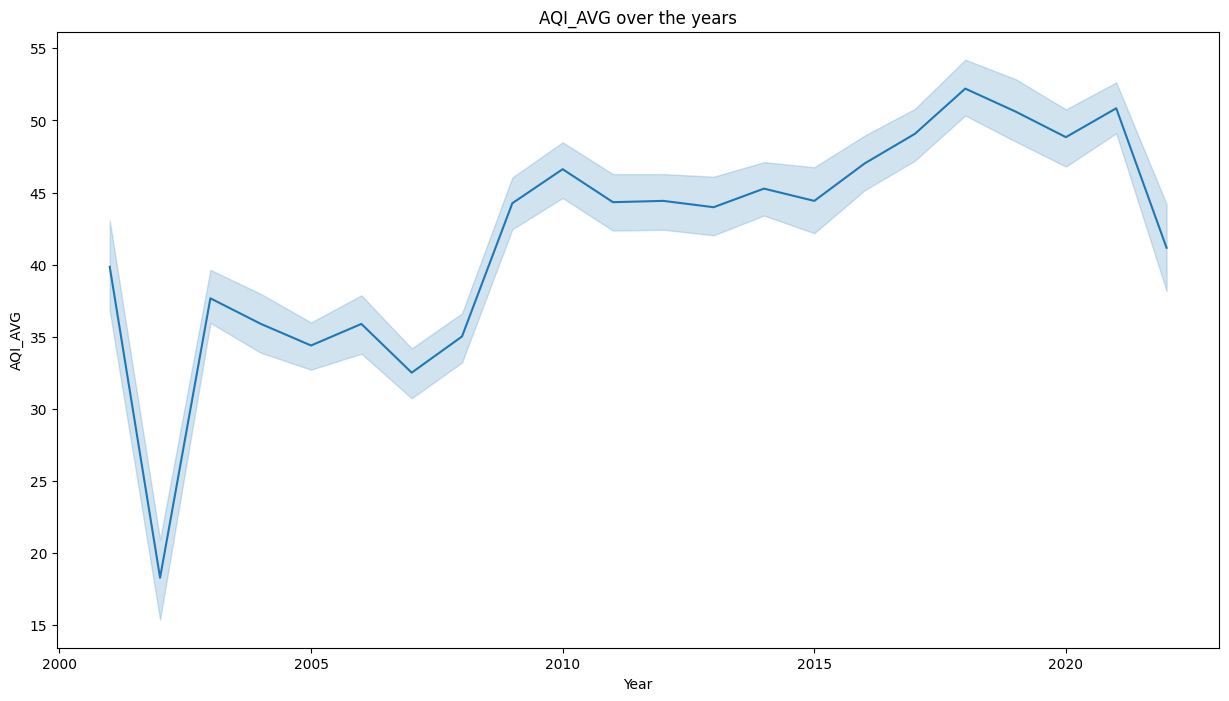

In [22]:
# plot AQI_AVG over the years
plt.figure(figsize=(15,8))
sns.lineplot(x=df1['Year'],y=df1['AQI_AVG'])
plt.title('AQI_AVG over the years')
plt.show()

## Summary of Total Pollutant Levels Grouped by Year

The provided output showcases the cumulative sum of various pollutants grouped by year and month. This tabulated data represents the total pollution levels recorded annually from 2001 to 2022.

### Key Observations:

- **Overall Trends:** 
  - There seems to be a fluctuating trend in different pollutants across the years. Some pollutants exhibit a steady increase or decrease, while others display variations from year to year.
  
- **Variations in Pollutants:** 
  - Pollutants such as NOx, NO2, and NO show considerable variation in the recorded levels over the years.
  - Emissions of PM10 and PM25, despite varying, still demonstrate substantial levels consistently over the years.

- **Yearly Fluctuations:** 
  - Notably, certain years (e.g., 2003, 2004, 2005) display higher overall pollutant levels across various categories, while others indicate relatively lower levels.
  
- **Potential Impact:** 
  - The data suggests a significant shift in pollution levels, indicating potential environmental and health implications for specific years or periods.

This comprehensive summary offers a high-level view of the total pollution levels for each year, providing valuable insights into the fluctuating trends in various pollutants over the years.


In [23]:
# group by year and month and calculate the sum of all pollutants
df2 = df1.copy()
df2.drop(['AQI_AVG','AQI_PM10','AQI_PM25','AQI_NO2','AQI_O3','AQI_CO','AQI_category'],axis=1,inplace=True)
df2 = df2.groupby(['Year','Month']).sum()

df2.drop(['Day'],axis=1,inplace=True)

df2.groupby(['Year']).sum()

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL
Year,,,,,,,,,,,,,,
2001,0.0,75.0,0.0,34.700000,0.0,1104.386580,2811.505736,4505.333874,2884.107251,1166.341342,600.000000,483.635714,75.0,248.651190
2002,0.0,43.0,0.0,0.000000,0.0,2073.374922,2468.083724,5646.051701,742.460200,817.205948,344.000000,484.193362,43.0,86.000000
2003,0.0,352.0,0.0,128.532697,0.0,11920.042228,21390.676411,39668.312940,12717.255573,7934.485971,2816.000000,3790.000747,352.0,1445.381525
2004,0.0,353.0,0.0,237.046664,0.0,12023.920198,21618.377656,40051.302363,12145.608595,7277.284330,2824.000000,3131.781288,353.0,1917.626406
2005,0.0,355.0,0.0,222.098798,0.0,11739.864550,22990.198186,40982.817998,11682.802766,7889.220070,2840.000000,3180.654073,355.0,740.516009
2006,0.0,328.0,0.0,76.642333,0.0,11732.782923,20890.608375,38875.475115,11265.173700,9879.552290,2624.000000,3017.692256,328.0,880.742218
2007,0.0,357.0,0.0,250.230632,0.0,11977.750814,21108.567483,39481.221846,11102.586152,9092.954014,2856.000000,3508.927723,357.0,1300.729679
2008,0.0,360.0,0.0,174.003195,0.0,9641.938294,20251.733250,35065.295809,12089.317933,7931.120162,2880.000000,3538.858059,360.0,1314.114030
2009,0.0,363.0,0.0,168.859744,0.0,9217.870943,17309.072707,31442.504367,15486.205430,7094.863614,3207.968698,3703.886229,363.0,1225.938445


## Plotting Pollutants Over Years

Next, we aim to plot different air pollutants' trends over the years. We can generate individual charts for pollutants such as CH4, EBE, NO, NO2, NOx, O3, PM10, PM25, SO2, TCH, and TOL.

The 'plot' function aggregates the sum of each pollutant across years and creates a separate plot for each pollutant. Each plot showcases the trend of the specific pollutant over time, offering insights into the variation and magnitude of pollutants across different years.


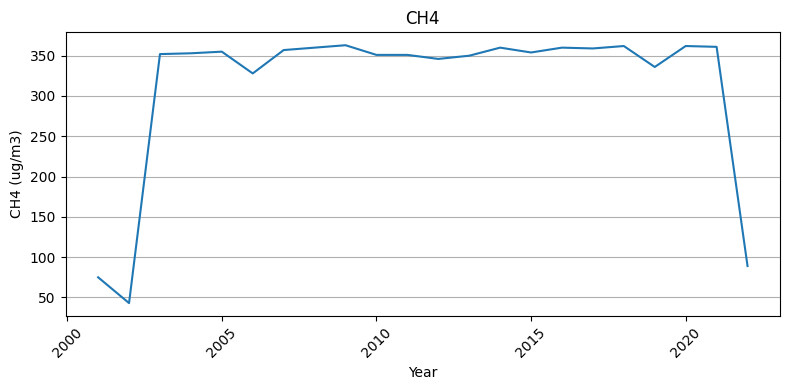

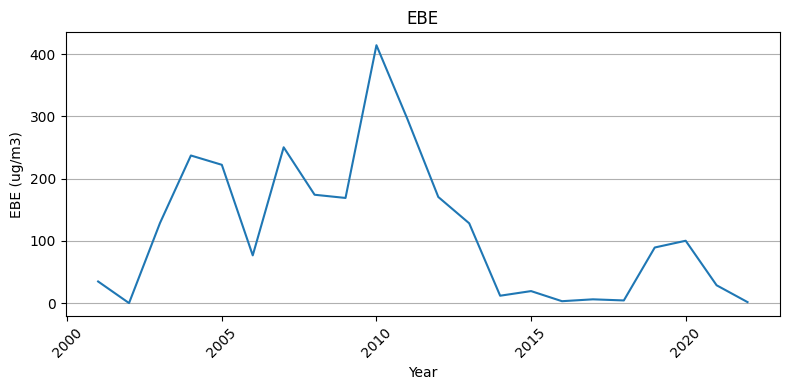

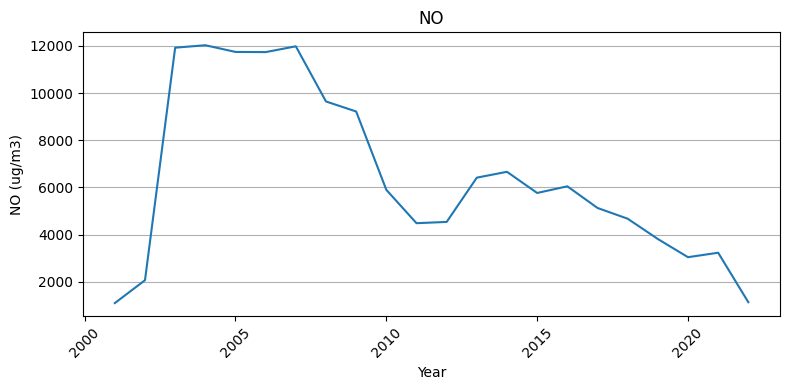

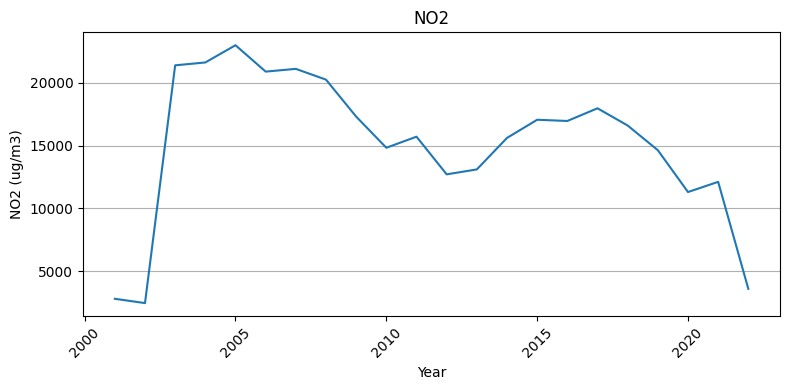

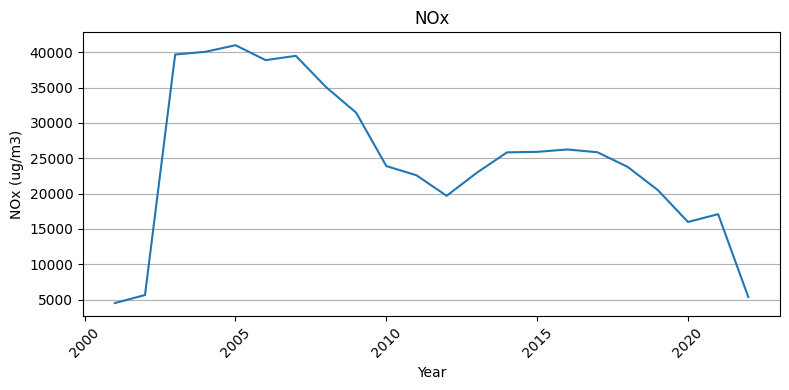

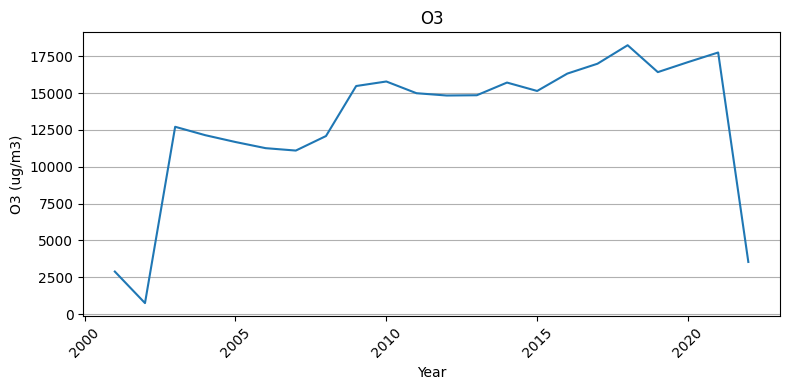

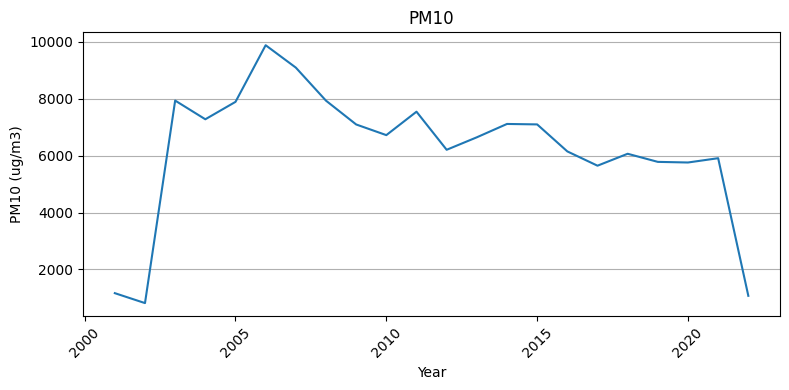

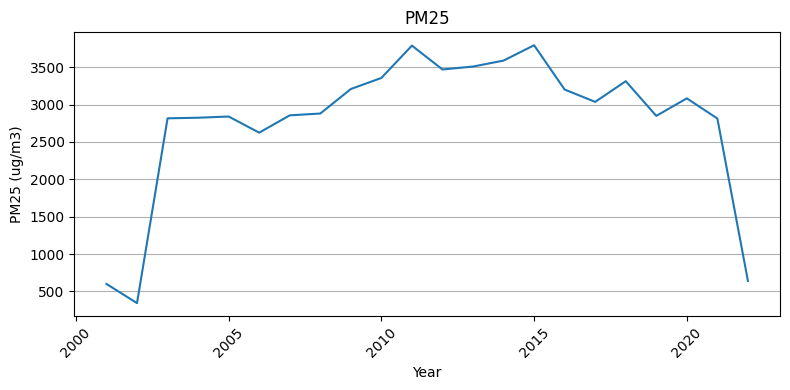

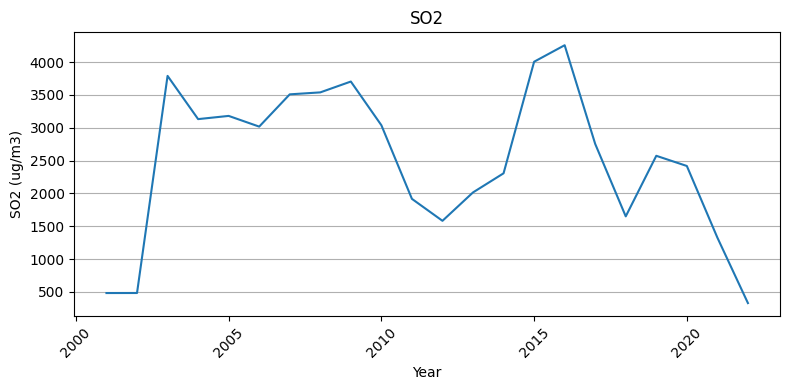

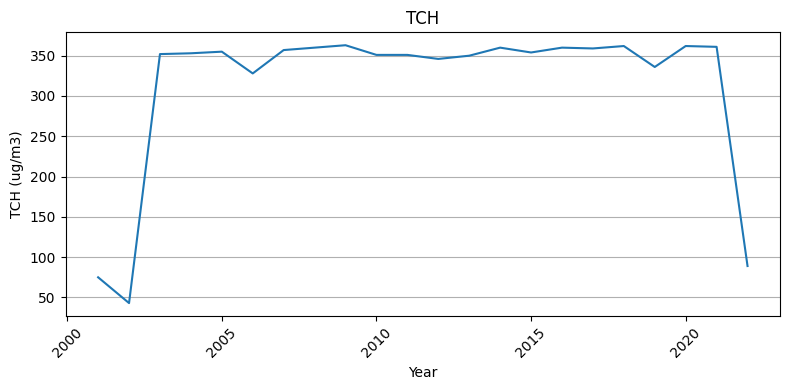

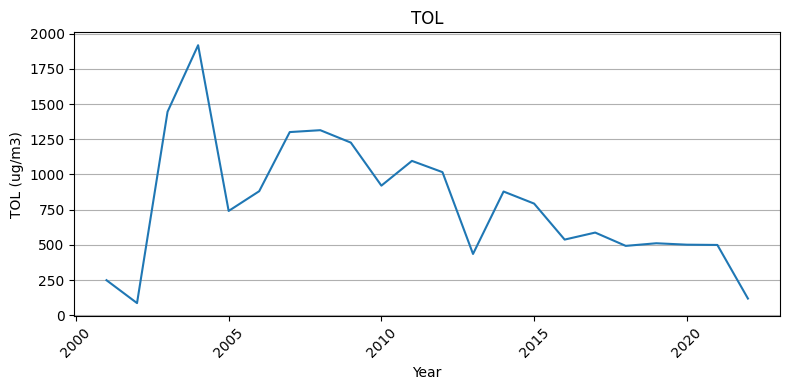

In [24]:
# plot all pollutants by year
def plot(df, title):
    ax = df.groupby(['Year']).sum().plot(figsize=(8, 4), legend=False, fontsize=10)
    ax.set_title(title)
    ax.set_ylabel(df.name + ' (ug/m3)')
    ax.set_xlabel('Year')
    ax.grid(axis='y')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

charts = ['CH4','EBE','NO','NO2','NOx','O3','PM10','PM25','SO2','TCH','TOL']

# display specific pollutants by year 
for i in charts:
    df2.name = i
    plot(df2[i], i)


## Feature Engineering: Rank Encoding for Categorical Columns

The code aims to transform categorical columns into numerical representations using rank encoding. This process involves converting categorical variables like 'Month', 'Year', and 'AQI_category' into numerical format to enable machine learning models to interpret these categorical values.

### Steps Performed:

1. **Copying the DataFrame:** A copy of the original DataFrame `df1` is created as `df3` to perform feature engineering without altering the original dataset.

2. **Dropping Columns:** Certain columns like 'AQI_PM10', 'AQI_PM25', 'AQI_NO2', 'AQI_O3', 'AQI_CO', 'AQI_AVG', and 'Day' are dropped, possibly due to being irrelevant for the rank encoding or having been used for other calculations.

3. **Conversion to Numeric Codes:**

   - The 'Month', 'Year', and 'AQI_category' columns are converted into categorical data types.
   
   - These categorical columns are then assigned numerical codes using the `cat.codes` method, generating numerical representations based on the categorical values' ranks.

### Output:

The output showcases the first ten rows of the modified DataFrame `df3`. Each row displays the transformed numerical representations of the original categorical columns, such as 'Month', 'Year', and 'AQI_category', along with the remaining continuous features.

Please note that the provided output displays the initial rows after the transformations, demonstrating the numerical representations of the categorical columns within the DataFrame.


In [25]:
# feature engineering
df3 = df1.copy()
df3.drop(['AQI_PM10','AQI_PM25','AQI_NO2','AQI_O3','AQI_CO','AQI_AVG','Day'],axis=1,inplace=True)

# convert categorical columns to numerical columns using rank encoding
df3['Month'] = df3['Month'].astype('category')

df3['Month'] = df3['Month'].cat.codes

df3['Year'] = df3['Year'].astype('category')

df3['Year'] = df3['Year'].cat.codes

df3['AQI_category'] = df3['AQI_category'].astype('category')

df3['AQI_category'] = df3['AQI_category'].cat.codes

In [26]:
df3.head(10)

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL,Month,Year,AQI_category
0,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,8.0,5.000000,1.0,2.000000,4,0,1
1,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,8.0,4.000000,1.0,2.666667,4,0,0
2,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,8.0,4.500000,1.0,2.000000,4,0,1
3,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,8.0,6.333333,1.0,2.666667,4,0,0
4,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,8.0,7.800000,1.0,2.600000,4,0,0
5,0.0,1.0,0.0,0.0,0.0,7.000000,27.000000,38.000000,21.000000,8.000000,8.0,4.000000,1.0,3.000000,4,0,0
6,0.0,1.0,0.0,1.0,0.0,36.500000,53.000000,108.500000,32.500000,21.500000,8.0,17.500000,1.0,3.000000,4,0,0
7,0.0,1.0,0.0,1.0,0.0,41.000000,64.333333,127.333333,6.333333,27.333333,8.0,16.333333,1.0,3.000000,4,0,0
8,0.0,1.0,0.0,0.0,0.0,11.000000,22.000000,39.000000,31.000000,5.000000,8.0,5.000000,1.0,3.000000,4,0,0
9,0.0,1.0,0.0,0.5,0.0,10.750000,18.750000,34.500000,30.750000,6.000000,8.0,7.250000,1.0,2.000000,4,0,0


## Extraction and Visualization of Highly Correlated Columns

The code snippet involves the following steps:

### High Correlation Extraction Function:

- **`get_high_corr` Function:** This function is designed to compute the correlation matrix of the input DataFrame `df` using `df.corr()`. It then filters the correlation matrix to identify pairs of columns that have a correlation coefficient greater than or equal to the specified threshold (0.6), excluding correlations of 1.000 (perfect correlation). 

  - The resulting `high_corr` DataFrame retains columns that exhibit high correlation based on the given threshold.

### Extraction and Visualization:

- **Extracting High Correlated Columns:** Using `get_high_corr`, the code identifies columns from DataFrame `df2` that exhibit high correlations meeting the specified threshold (0.6). The resulting DataFrame `high_corr` contains these pairs of highly correlated columns.

- **Heatmap Visualization:** Utilizing Seaborn's heatmap functionality, a heatmap visualization of the `high_corr` DataFrame is created. This heatmap visually represents the degree of correlation between the identified highly correlated columns. The annotations on the heatmap show the correlation coefficients.


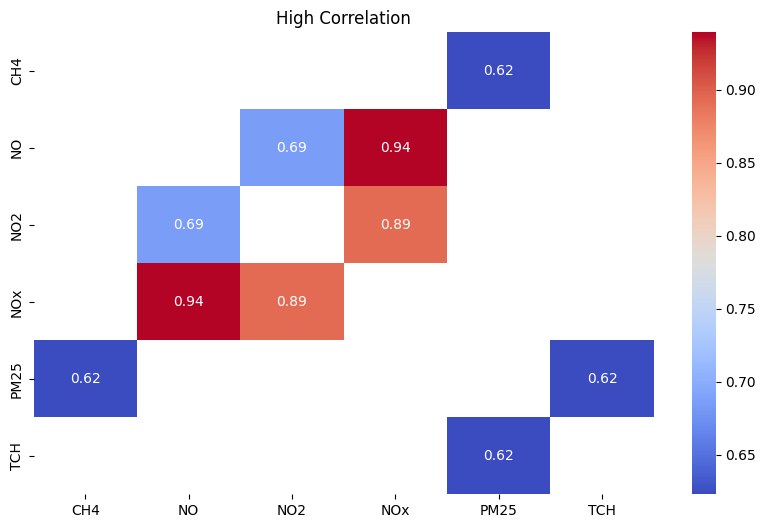

In [27]:
# function to extract high correlated columns
def get_high_corr(df, threshold):
    corr = df.corr()
    high_corr = corr[((corr >= threshold) | (corr <= -threshold)) & (corr != 1.000)]
    high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)
    return high_corr

# get high correlated columns
high_corr = get_high_corr(df2, 0.6)

# plot high correlated columns
plt.figure(figsize=(10, 6))
plot = sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plot.set_title('High Correlation')
plt.show()

### Displaying the First 10 Rows of Transformed DataFrame `df3`

The output showcases the first 10 rows of the DataFrame `df3` following feature engineering operations. Below are some key points observed from the displayed data:

- **Column Transformation:** Categorical columns like 'Month', 'Year', and 'AQI_category' have been converted to numerical representations using rank encoding.

- **Feature Engineering:** Certain columns such as 'AQI_PM10', 'AQI_PM25', 'AQI_NO2', 'AQI_O3', 'AQI_CO', 'AQI_AVG', and 'Day' have been dropped from the DataFrame to prepare the data for modeling or analysis purposes.

- **Numerical Data:** The columns 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2', 'TCH', 'TOL', 'Month', 'Year', and 'AQI_category' are displayed, showing their corresponding numerical values for the first 10 rows.

- **Example Rows:** For instance, in the first row displayed, the values in each column for the respective features indicate specific numerical measurements or ranks after the feature engineering steps.

This output signifies the transformed data structure ready for further analysis, model training, or exploration, having converted categorical columns to numerical representations and processed specific features for downstream tasks.


In [28]:
df3.head(10)

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL,Month,Year,AQI_category
0,0.0,1.0,0.0,0.0,0.0,6.500000,24.000000,34.000000,44.000000,6.500000,8.0,5.000000,1.0,2.000000,4,0,1
1,0.0,1.0,0.0,0.0,0.0,12.000000,29.666667,48.333333,31.000000,14.666667,8.0,4.000000,1.0,2.666667,4,0,0
2,0.0,1.0,0.0,0.0,0.0,23.000000,31.000000,66.500000,33.000000,11.000000,8.0,4.500000,1.0,2.000000,4,0,1
3,0.0,1.0,0.0,0.0,0.0,8.666667,34.333333,47.666667,31.666667,10.333333,8.0,6.333333,1.0,2.666667,4,0,0
4,0.0,1.0,0.0,0.0,0.0,10.200000,22.800000,38.400000,30.200000,13.200000,8.0,7.800000,1.0,2.600000,4,0,0
5,0.0,1.0,0.0,0.0,0.0,7.000000,27.000000,38.000000,21.000000,8.000000,8.0,4.000000,1.0,3.000000,4,0,0
6,0.0,1.0,0.0,1.0,0.0,36.500000,53.000000,108.500000,32.500000,21.500000,8.0,17.500000,1.0,3.000000,4,0,0
7,0.0,1.0,0.0,1.0,0.0,41.000000,64.333333,127.333333,6.333333,27.333333,8.0,16.333333,1.0,3.000000,4,0,0
8,0.0,1.0,0.0,0.0,0.0,11.000000,22.000000,39.000000,31.000000,5.000000,8.0,5.000000,1.0,3.000000,4,0,0
9,0.0,1.0,0.0,0.5,0.0,10.750000,18.750000,34.500000,30.750000,6.000000,8.0,7.250000,1.0,2.000000,4,0,0


### Null Values Check in DataFrame `df3`

The output indicates the count of null values per column in DataFrame `df3`. In this case, there are no missing values detected in any of the columns.

- **No Missing Data:** Each column, including 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM25', 'SO2', 'TCH', 'TOL', 'Month', 'Year', and 'AQI_category', reports a count of zero null values.
  
- **Data Completeness:** This suggests that the dataset appears to be complete, without any missing or NaN values in the specified columns, ensuring that each column contains valid, non-null data.

The absence of null values in the DataFrame suggests that it is consistent and ready for analysis or further processing without requiring imputation or handling of missing data.


In [29]:
df3.isnull().sum()

BEN             0
CH4             0
CO              0
EBE             0
NMHC            0
NO              0
NO2             0
NOx             0
O3              0
PM10            0
PM25            0
SO2             0
TCH             0
TOL             0
Month           0
Year            0
AQI_category    0
dtype: int64

### DataFrame Shape Information

The output `(6927, 17)` indicates the dimensions of DataFrame `df3`.

- **Rows:** The DataFrame contains 6927 rows. Each row typically corresponds to a unique observation or sample in your dataset.

- **Columns:** It consists of 17 columns. Each column represents a specific feature or attribute in your dataset.

This shape, 6927 rows by 17 columns, demonstrates the size and structure of the DataFrame, showcasing the number of data points and the features available for analysis or modeling purposes.


In [30]:
df3.shape

(6927, 17)

### Descriptive Statistics of DataFrame `df3`

The `describe()` method in pandas provides statistical information for each numeric column in the DataFrame.

- **Count:** The number of non-null values in each column.

- **Mean:** The average value of each column.

- **Std:** The standard deviation which measures the dispersion or spread of the values.

- **Min:** The minimum value present in each column.

- **25%:** The first quartile, which represents the value below which 25% of the data falls.

- **50% (Median):** The median or the middle value in the dataset. 50% of the data falls below this value.

- **75%:** The third quartile, which represents the value below which 75% of the data falls.

- **Max:** The maximum value present in each column.

This statistical summary helps in understanding the central tendency, dispersion, and range of values in each numerical column of the DataFrame `df3`.


In [31]:
df3.describe()

,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM25,SO2,TCH,TOL,Month,Year,AQI_category
count,6927.0,6927.0,6927.0,6927.000000,6927.0,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.000000,6927.0,6927.000000,6927.000000,6927.000000,6927.000000
mean,0.0,1.0,0.0,0.370246,0.0,20.544889,48.082697,79.587330,41.563510,19.746569,8.868612,7.942551,1.0,2.532670,5.531543,10.979645,0.786632
std,0.0,0.0,0.0,0.458048,0.0,14.944931,15.638697,35.412983,18.991506,10.203481,3.198700,4.002903,0.0,1.914285,3.429603,5.685751,0.646482
min,0.0,1.0,0.0,0.000000,0.0,1.000000,7.250000,8.708333,0.285714,2.500000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.0,0.0,0.000000,0.0,9.906926,37.333333,55.000000,27.146429,11.833333,7.875000,4.909091,1.0,1.142857,3.000000,6.000000,0.000000
50%,0.0,1.0,0.0,0.157895,0.0,16.826087,47.157895,73.388889,41.727273,17.750000,8.000000,7.380952,1.0,2.000000,6.000000,11.000000,1.000000
75%,0.0,1.0,0.0,0.666667,0.0,27.181985,57.784722,98.666667,56.087121,26.058824,9.872283,10.411765,1.0,3.416667,8.000000,16.000000,1.000000
max,0.0,1.0,0.0,2.000000,0.0,107.000000,120.550000,278.000000,95.272727,65.800000,28.000000,22.000000,1.0,11.000000,11.000000,21.000000,3.000000


### Saved Cleaned Dataset

The code successfully saved the cleaned dataset, represented by the DataFrame `df3`, into a CSV file named `'MadridPolution2001-2022_cleaned.csv'`. This file is stored in the `'data/'` directory. The `index=False` parameter indicates that the DataFrame index was not included in the saved file.


In [32]:
# save the cleaned dataset
df3.to_csv('data/MadridPolution2001-2022_cleaned.csv', index=False)